### 6a. Creating a dataset, using cosine logic

In [1]:
import numpy as np

np.random.seed(0)
x = np.sort(5 * np.random.rand(100))
y = np.cos(x) + np.random.normal(0, 0.1, size=100)

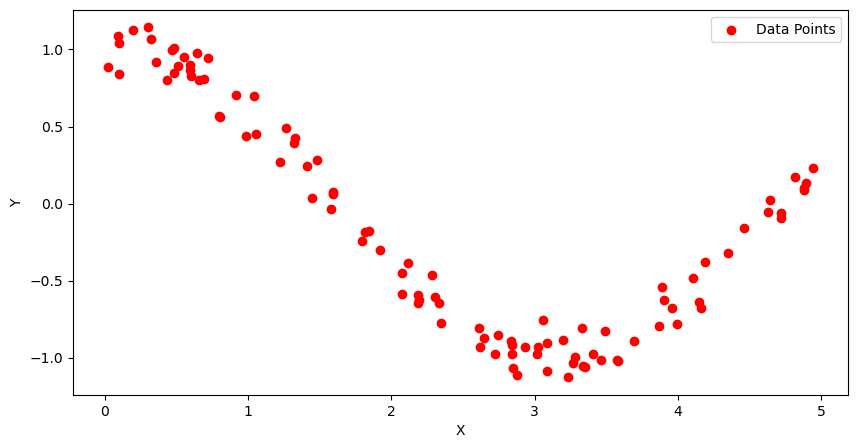

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### b. Creating Locally Weighted Regression function

In [3]:
def lwr(x, y, x_query, tau):
    m = len(x)
    y_pred = np.zeros(len(x_query))
    
    for i, xq in enumerate(x_query):
        weights = np.exp(-((x-xq) ** 2) / (2 * tau ** 2))
        W = np.diag(weights)
        X = np.vstack((np.ones(m), x)).T
        theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
        y_pred[i] = np.array([1, xq]) @ theta
        
    return y_pred

### Perform locally weighted regression

In [4]:
x_query = np.linspace(0, 5, 100)
tau = 0.5

y_pred = lwr(x, y, x_query, tau)

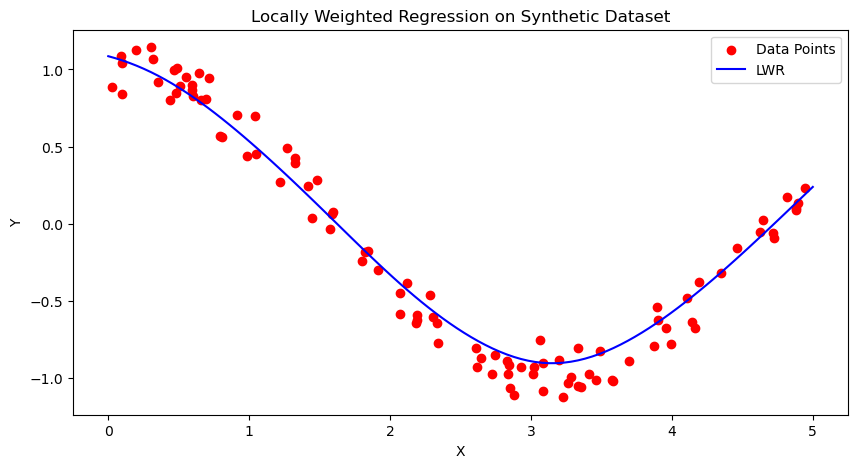

In [5]:
#Drawing graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x, y, color = 'red', label = 'Data Points')
plt.plot(x_query, y_pred, color = 'blue', label = 'LWR')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression on Synthetic Dataset')
plt.legend()
plt.show()